<a href="https://www.kaggle.com/code/saibhossain/confusion-matrix?scriptVersionId=288755211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### What is a Confusion Matrix?

A Confusion Matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. [IBM](https://www.ibm.com/think/topics/confusion-matrix)

It compares Actual Values (Ground Truth) against Predicted Values (What your AI said).

Let's use a Medical Example (relevant to your research):

1. Positive (1): Patient has Cancer.

2. Negative (0): Patient is Healthy.

|                     | **Predicted: NO (Healthy)**                                      | **Predicted: YES (Cancer)**                                             |
|---------------------|------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Actual: NO (Healthy)** | **True Negative (TN)**<br>(Correct: Doctor said healthy, patient is healthy) | **False Positive (FP)**<br>(Type I Error: Doctor said cancer, but patient is healthy — "False Alarm") |
| **Actual: YES (Cancer)** | **False Negative (FN)**<br>(Type II Error: Doctor said healthy, but patient has cancer — "Missed Diagnosis") | **True Positive (TP)**<br>(Correct: Doctor said cancer, patient has cancer) |

# Dummy Data (Ground Truth vs Predictions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Define 3 Classes
classes = ['Apple', 'Banana', 'Cherry']

# 2. Generate Dummy Data (Ground Truth vs Predictions)
# 0 = Apple, 1 = Banana, 2 = Cherry
# We simulate a model that is mostly correct but makes specific errors.
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2]
y_pred = [0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2]

# 3. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Generate Classification Report (Precision, Recall, F1)
report = classification_report(y_true, y_pred, target_names=classes)

print("--- 3-Class Confusion Matrix Data ---")
print(cm)
print("\n--- Detailed Classification Report ---")
print(report)

--- 3-Class Confusion Matrix Data ---
[[4 1 0]
 [0 4 1]
 [1 0 4]]

--- Detailed Classification Report ---
              precision    recall  f1-score   support

       Apple       0.80      0.80      0.80         5
      Banana       0.80      0.80      0.80         5
      Cherry       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.80      0.80      0.80        15



<Figure size 800x600 with 0 Axes>

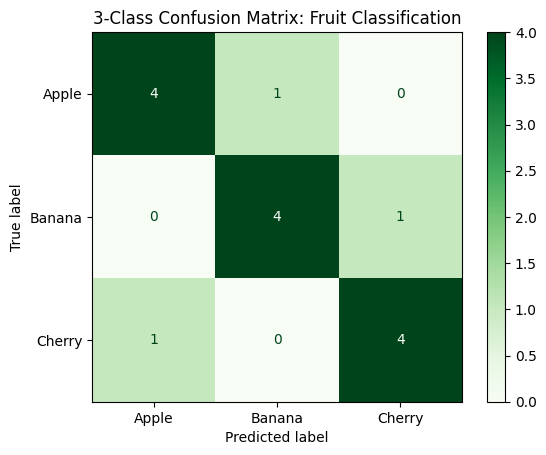

In [2]:
# 5. Visualize
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot with a Green color map
disp.plot(cmap=plt.cm.Greens)
plt.title('3-Class Confusion Matrix: Fruit Classification')
plt.show()

# First convert the Multi class matrix in to Binary class matrix

Standard formulas like Precision, Recall, and F1-Score are mathematically designed for only TWO categories (Positive vs. Negative). They simply cannot handle a 3x3 or 5x5 grid directly.

To use these formulas on a multi-class problem (like 3 types of lung nodules), we must simplify the complex view into a series of simple "Yes/No" questions.


In a 3-Class World (Apple, Banana, Cherry), if the input is an Apple:

* Is "Banana" a Negative? Yes.

* Is "Cherry" a Negative? Yes.


The formula doesn't care which wrong fruit it is; it only cares that it is NOT an Apple. Therefore, we must group "Banana" and "Cherry" together into a single "Not Apple" bucket to fit the math.


|                     | **Predicted A**                          | **Predicted NOT A**                        |
|---------------------|------------------------------------------|--------------------------------------------|
| **Actual A**        | **TP** (True Positive)         | **FN** (False Negative) |
| **Actual NOT A**    | **FP** (False Positive) | **TN** (True Negative) |

In [3]:
# Dummy Dataset

# Let's assume: 0 = Apple, 1 = Banana, 2 = Cherry
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2]
y_pred = [0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2]

# Map numbers to names for display
class_map = {0: 'Apple', 1: 'Banana', 2: 'Cherry'}
classes = [0, 1, 2]

print("Total Samples:", len(y_true))

Total Samples: 15


In [4]:
# Helper Function Binary Matrix per Class

import matplotlib.pyplot as plt

def get_binary_matrix(y_true, y_pred,target_class):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_true)):
        actual = y_true[i]
        predicted = y_pred[i]

        if actual == target_class and predicted == target_class:
            TP += 1 
        elif actual != target_class and predicted != target_class:
            TN += 1
        elif actual != target_class and predicted == target_class:
            FP += 1
        elif actual == target_class and predicted != target_class:
            FN += 1

    return [[TN,FP],[FN,TP]]

def plot_binary_matrix(matrix,class_name):
    fig, ax = plt.subplots(figsize=(6,4))
    im = ax.imshow(matrix,cmap='Blues',vmin=0)

    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{labels[i][j]}\n{matrix[i][j]}", 
                    ha='center', va='center', color='black', 
                    fontsize=22, fontweight='bold')

    ax.set_title(f"Confusion Matrix: {class_name}", fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels([f'Not {class_name}', class_name])
    ax.set_yticklabels([f'Not {class_name}', class_name])
    plt.tight_layout()
    plt.show()

Matrix: 
 [[TN=9  FP=1] 
  [FN=0   TP=5]]




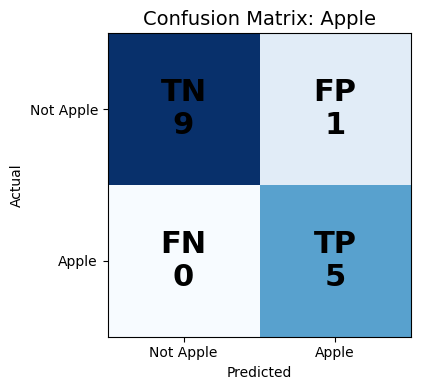

In [5]:
# Binary Matrix for Apple class 0

apple_matrix = get_binary_matrix(y_true, y_pred, target_class=0)
TN, FP = apple_matrix[0]
FN, TP = apple_matrix[1]
print(f"Matrix: \n [[TN={TN}  FP={FP}] \n  [FN={FN}   TP={TP}]]\n\n")

plot_binary_matrix(apple_matrix,"Apple")

Matrix: 
 [[TN=10  FP=0] 
  [FN=1   TP=4]]




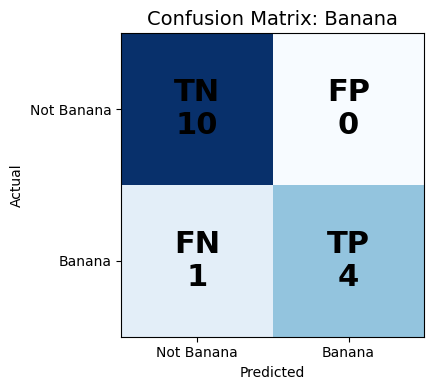

In [6]:
# Binary Matrix for Banana class 1

Banana_matrix = get_binary_matrix(y_true, y_pred, target_class=1)
TN, FP = Banana_matrix[0]
FN, TP = Banana_matrix[1]
print(f"Matrix: \n [[TN={TN}  FP={FP}] \n  [FN={FN}   TP={TP}]]\n\n")

plot_binary_matrix(Banana_matrix,"Banana")

Matrix: 
 [[TN=9  FP=1] 
  [FN=1   TP=4]]




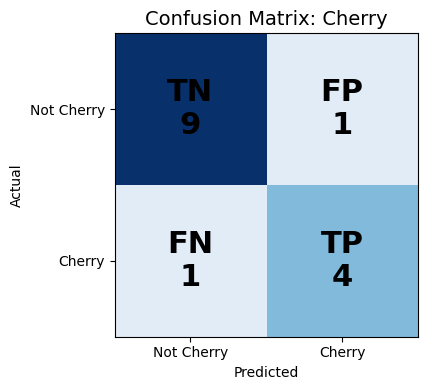

In [7]:
# Binary Matrix for Cherry class 2

Cherry_matrix = get_binary_matrix(y_true, y_pred, target_class=2)
TN, FP = Cherry_matrix[0]
FN, TP = Cherry_matrix[1]
print(f"Matrix: \n [[TN={TN}  FP={FP}] \n  [FN={FN}   TP={TP}]]\n\n")

plot_binary_matrix(Cherry_matrix,"Cherry")

# The Metrics: Formulas & Meaning

In [8]:
# Helper Function 

def get_counts(y_true, y_pred, target_class):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_true)):
        if y_true[i] == target_class and y_pred[i] == target_class:
            TP += 1 
        elif y_true[i] != target_class and y_pred[i] != target_class:
            TN += 1
        elif y_true[i] != target_class and y_pred[i] == target_class:
            FP += 1
        elif y_true[i] == target_class and y_pred[i] != target_class:
            FN += 1
            
    print(f"\n[Counts for Class {target_class}] TP={TP}, TN={TN}, FP={FP}, FN={FN}")
    return TP, TN, FP, FN


def calculate_accuracy(y_true, y_pred, target_class):
    print(f"\n--- Calculating ACCURACY (Class {target_class}) ---")
    TP, TN, FP, FN = get_counts(y_true, y_pred, target_class)
    print("Formula: (TP + TN) / (TP + TN + FP + FN)")
    print(f"Values:  ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN})")
    numerator = TP + TN
    denominator = TP + TN + FP + FN
    print(f"Step 1:  {numerator} / {denominator}")
    
    if denominator == 0:
        print("Result:  0.0 (Division by Zero)")
        return 0.0
    else:
        result = numerator / denominator
        print(f"Result:  {result:.4f}")
        return result

def calculate_precision(y_true, y_pred, target_class):
    print(f"\n--- Calculating PRECISION (Class {target_class}) ---")
    TP, TN, FP, FN = get_counts(y_true, y_pred, target_class)
    print("Formula: TP / (TP + FP)")
    print(f"Values:  {TP} / ({TP} + {FP})")
    numerator = TP
    denominator = TP + FP
    print(f"Step 1:  {numerator} / {denominator}")
    
    if denominator == 0:
        print("Result:  0.0 (Division by Zero)")
        return 0.0
    else:
        result = numerator / denominator
        print(f"Result:  {result:.4f}")
        return result

def calculate_recall(y_true, y_pred, target_class):
    print(f"\n--- Calculating RECALL (Class {target_class}) ---")
    TP, TN, FP, FN = get_counts(y_true, y_pred, target_class)
    print("Formula: TP / (TP + FN)")
    print(f"Values:  {TP} / ({TP} + {FN})")

    numerator = TP
    denominator = TP + FN
    print(f"Step 1:  {numerator} / {denominator}")

    if denominator == 0:
        print("Result:  0.0 (Division by Zero)")
        return 0.0
    else:
        result = numerator / denominator
        print(f"Result:  {result:.4f}")
        return result

def calculate_f1(y_true, y_pred, target_class):
    print(f"\n--- Calculating F1 SCORE (Class {target_class}) ---")
    TP, TN, FP, FN = get_counts(y_true, y_pred, target_class)
    prec = TP / (TP + FP) if (TP + FP) > 0 else 0
    rec  = TP / (TP + FN) if (TP + FN) > 0 else 0

    print("Formula: 2 * (Precision * Recall) / (Precision + Recall)")
    print(f"Values:  2 * ({prec:.2f} * {rec:.2f}) / ({prec:.2f} + {rec:.2f})")

    numerator = 2 * (prec * rec)
    denominator = prec + rec
    print(f"Step 1:  {numerator:.4f} / {denominator:.4f}")
    
    if denominator == 0:
        print("Result:  0.0 (Division by Zero)")
        return 0.0
    else:
        result = numerator / denominator
        print(f"Result:  {result:.4f}")
        return result


def calculate_specificity(y_true, y_pred, target_class):
    print(f"\n--- Calculating SPECIFICITY (Class {target_class}) ---")
    TP, TN, FP, FN = get_counts(y_true, y_pred, target_class)
    print("Formula: TN / (TN + FP)")
    print(f"Values:  {TN} / ({TN} + {FP})")
    
    denominator = TN + FP
    if denominator == 0:
        print("Result:  0.0 (Division by Zero)")
        return 0.0
        
    result = TN / denominator
    print(f"Result:  {result:.4f}")
    return result

def calculate_error_rate(y_true, y_pred):
    print(f"\n--- Calculating GLOBAL ERROR RATE ---")
    
    incorrect = 0
    total = len(y_true)
    
    for i in range(total):
        if y_true[i] != y_pred[i]:
            incorrect += 1
            
    print("Formula: (Incorrect Predictions) / Total Samples")
    print(f"Values:  {incorrect} / {total}")
    
    if total == 0:
        return 0.0
        
    result = incorrect / total
    print(f"Result:  {result:.4f} (or {result*100:.1f}%)")
    return result


def calculate_macro_f1(y_true, y_pred):
    print(f"\n=== Calculating MACRO F1 SCORE ===")
    print("(Step 1: Calculate F1 for each class independently)")
    
    unique_classes = sorted(set(y_true))
    f1_sum = 0
    n_classes = len(unique_classes)

    for c in unique_classes:
        TP, TN, FP, FN = get_counts(y_true, y_pred, c)
        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec  = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1   = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
        
        print(f" > Class {c}: F1 = {f1:.4f}")
        f1_sum += f1
        
    print("\n(Step 2: Average them)")
    print("Formula: Sum of F1 Scores / Number of Classes")
    print(f"Values:  {f1_sum:.4f} / {n_classes}")
    
    macro_f1 = f1_sum / n_classes
    print(f"Result:  {macro_f1:.4f}")
    return macro_f1

def calculate_weighted_f1(y_true, y_pred):
    print(f"\n=== Calculating WEIGHTED F1 SCORE ===")
    print("(Step 1: Calculate F1 and Support for each class)")
    
    unique_classes = sorted(set(y_true))
    total_samples = len(y_true)
    weighted_sum = 0
    
    print(f"{'Class':<6} | {'F1 Score':<10} | {'Support':<8} | {'Weighted Contribution':<20}")
    print("-" * 55)
    
    for c in unique_classes:
        TP, TN, FP, FN = get_counts(y_true, y_pred, c)
        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec  = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1   = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
        support = 0
        for val in y_true:
            if val == c: support += 1
        weight_factor = support / total_samples
        contribution = f1 * weight_factor
        weighted_sum += contribution
        
        print(f"{c:<6} | {f1:.4f}     | {support:<8} | {f1:.2f} * ({support}/{total_samples}) = {contribution:.4f}")

    print("-" * 55)
    print("\n(Step 2: Sum the contributions)")
    print("Formula: Sum(F1_class * (Support_class / Total_Samples))")
    print(f"Result:  {weighted_sum:.4f}")
    return weighted_sum

These metrics translate the four confusion matrix components (TP, TN, FP, FN) into interpretable performance scores.

---

### A. Accuracy  
**Definition**: The percentage of total predictions our model got right.  
**Formula**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$  
**Why use it?**  
Good for general intuition when classes are **balanced** (50% healthy, 50% cancer).  

**⚠️ The Trap**:  
If 95% of patients are healthy, a model that *always predicts "Healthy"* achieves 95% accuracy—but is clinically useless. **Never rely on accuracy alone in medical AI** with imbalanced data.

In [9]:
acc = calculate_accuracy(y_true, y_pred, target_class=0)


--- Calculating ACCURACY (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: (TP + TN) / (TP + TN + FP + FN)
Values:  (5 + 9) / (5 + 9 + 1 + 0)
Step 1:  14 / 15
Result:  0.9333


In [10]:
acc = calculate_accuracy(y_true, y_pred, target_class=1)


--- Calculating ACCURACY (Class 1) ---

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
Formula: (TP + TN) / (TP + TN + FP + FN)
Values:  (4 + 10) / (4 + 10 + 0 + 1)
Step 1:  14 / 15
Result:  0.9333


In [11]:
acc = calculate_accuracy(y_true, y_pred, target_class=2)


--- Calculating ACCURACY (Class 2) ---

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
Formula: (TP + TN) / (TP + TN + FP + FN)
Values:  (4 + 9) / (4 + 9 + 1 + 1)
Step 1:  13 / 15
Result:  0.8667


---

### B. Precision  
**Definition**: Of all patients predicted as having cancer, how many actually had it?  
**Formula**:  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$  
**Focus**: *Quality* of positive predictions.  
**When to use**: When **minimizing False Positives (FP)** is critical.  
**Example**: Email spam detection—you don’t want to misclassify an important email as spam (FP).

In [12]:
prec = calculate_precision(y_true, y_pred, target_class=0)


--- Calculating PRECISION (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: TP / (TP + FP)
Values:  5 / (5 + 1)
Step 1:  5 / 6
Result:  0.8333


In [13]:
prec = calculate_precision(y_true, y_pred, target_class=1)


--- Calculating PRECISION (Class 1) ---

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
Formula: TP / (TP + FP)
Values:  4 / (4 + 0)
Step 1:  4 / 4
Result:  1.0000


In [14]:
prec = calculate_precision(y_true, y_pred, target_class=2)


--- Calculating PRECISION (Class 2) ---

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
Formula: TP / (TP + FP)
Values:  4 / (4 + 1)
Step 1:  4 / 5
Result:  0.8000


---

### C. Recall (Sensitivity)  
**Definition**: Of all patients who actually have cancer, how many did the model correctly identify?  
**Formula**:  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$  
**Focus**: *Coverage* of actual positives.  
**When to use**: When **minimizing False Negatives (FN)** is vital.  
**Example**: **Lung cancer screening**—it’s safer to trigger extra tests for a healthy patient (FP) than to miss a cancer case (FN). **High Recall is critical here.**

In [15]:
rec = calculate_recall(y_true, y_pred, target_class=0)


--- Calculating RECALL (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: TP / (TP + FN)
Values:  5 / (5 + 0)
Step 1:  5 / 5
Result:  1.0000


In [16]:
rec = calculate_recall(y_true, y_pred, target_class=1)


--- Calculating RECALL (Class 1) ---

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
Formula: TP / (TP + FN)
Values:  4 / (4 + 1)
Step 1:  4 / 5
Result:  0.8000


In [17]:
rec = calculate_recall(y_true, y_pred, target_class=2)


--- Calculating RECALL (Class 2) ---

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
Formula: TP / (TP + FN)
Values:  4 / (4 + 1)
Step 1:  4 / 5
Result:  0.8000


---

### D. F1 Score  
**Definition**: The **harmonic mean** of Precision and Recall—balances both.  
**Formula**:  
$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  
**When to use**:  
- When you need a single metric that balances Precision and Recall.  
- Especially useful for **imbalanced datasets** (e.g., 10 cancer vs. 1000 healthy patients).

In [18]:
f1 = calculate_f1(y_true, y_pred, target_class=0)


--- Calculating F1 SCORE (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Values:  2 * (0.83 * 1.00) / (0.83 + 1.00)
Step 1:  1.6667 / 1.8333
Result:  0.9091


In [19]:
f1 = calculate_f1(y_true, y_pred, target_class=1)


--- Calculating F1 SCORE (Class 1) ---

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Values:  2 * (1.00 * 0.80) / (1.00 + 0.80)
Step 1:  1.6000 / 1.8000
Result:  0.8889


In [20]:
f1 = calculate_f1(y_true, y_pred, target_class=2)


--- Calculating F1 SCORE (Class 2) ---

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Values:  2 * (0.80 * 0.80) / (0.80 + 0.80)
Step 1:  1.2800 / 1.6000
Result:  0.8000


### E. **Macro F1 Score**
- **Definition**: Unweighted average of F1 scores for each class. Treats all classes equally.
- **Formula**:  
  $$
  \text{Macro F1} = \frac{1}{C} \sum_{i=1}^{C} \text{F1}_i
  $$
  where \( C \) = number of classes, and \( \text{F1}_i \) is the F1 score for class \( i \).
- **Use when**: You care **equally about rare and common classes** (e.g., detecting rare cancer subtypes).

In [21]:
calculate_macro_f1(y_true, y_pred)


=== Calculating MACRO F1 SCORE ===
(Step 1: Calculate F1 for each class independently)

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
 > Class 0: F1 = 0.9091

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
 > Class 1: F1 = 0.8889

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
 > Class 2: F1 = 0.8000

(Step 2: Average them)
Formula: Sum of F1 Scores / Number of Classes
Values:  2.5980 / 3
Result:  0.8660


0.8659932659932661

---

### F. **Weighted F1 Score**
- **Definition**: Average of F1 scores weighted by the number of true samples (support) in each class.
- **Formula**:  
  $$
  \text{Weighted F1} = \frac{\sum_{i=1}^{C} (\text{F1}_i \times \text{support}_i)}{\sum_{i=1}^{C} \text{support}_i}
  $$
- **Use when**: You want performance to reflect the **class distribution** (e.g., real-world imbalanced medical data).

In [22]:
calculate_weighted_f1(y_true, y_pred)


=== Calculating WEIGHTED F1 SCORE ===
(Step 1: Calculate F1 and Support for each class)
Class  | F1 Score   | Support  | Weighted Contribution
-------------------------------------------------------

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
0      | 0.9091     | 5        | 0.91 * (5/15) = 0.3030

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
1      | 0.8889     | 5        | 0.89 * (5/15) = 0.2963

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
2      | 0.8000     | 5        | 0.80 * (5/15) = 0.2667
-------------------------------------------------------

(Step 2: Sum the contributions)
Formula: Sum(F1_class * (Support_class / Total_Samples))
Result:  0.8660


0.865993265993266

---

###  Advanced Metrics: Macro vs. Weighted (for Multi-Class)

When dealing with **more than two classes** (*Benign*, *Malignant*, *Normal*), we average per-class scores:

#### 📌 Macro F1 Score  
- Compute F1 for each class **independently**, then take the **unweighted average**.  
- **Use when**: All classes are **equally important**, even rare ones.

#### 📌 Weighted F1 Score  
- Compute F1 for each class, then **weight by support** (number of true instances per class).  
- **Use when**: You want performance to reflect the **majority class** more (common in real-world skewed data).

---

### G. **Error Rate**
- **Definition**: Proportion of incorrect predictions.
- **Formula**:  
  $$
  \text{Error Rate} = 1 - \text{Accuracy} = \frac{FP + FN}{TP + TN + FP + FN}
  $$
- **Interpretation**: Lower is better. Often more intuitive than accuracy in high-stakes settings.

In [23]:
calculate_error_rate(y_true, y_pred)


--- Calculating GLOBAL ERROR RATE ---
Formula: (Incorrect Predictions) / Total Samples
Values:  2 / 15
Result:  0.1333 (or 13.3%)


0.13333333333333333

---

### H. **Specificity (True Negative Rate)**
- **Definition**: Of all truly healthy (negative) patients, how many were correctly identified?
- **Formula**:  
  $$
  \text{Specificity} = \frac{TN}{TN + FP}
  $$
- **Use when**: Avoiding **false alarms** is important ( unnecessary biopsies).

In [24]:
calculate_specificity(y_true, y_pred, target_class=0)


--- Calculating SPECIFICITY (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: TN / (TN + FP)
Values:  9 / (9 + 1)
Result:  0.9000


0.9

In [25]:
calculate_specificity(y_true, y_pred, target_class=1)


--- Calculating SPECIFICITY (Class 1) ---

[Counts for Class 1] TP=4, TN=10, FP=0, FN=1
Formula: TN / (TN + FP)
Values:  10 / (10 + 0)
Result:  1.0000


1.0

In [26]:
calculate_specificity(y_true, y_pred, target_class=2)


--- Calculating SPECIFICITY (Class 2) ---

[Counts for Class 2] TP=4, TN=9, FP=1, FN=1
Formula: TN / (TN + FP)
Values:  9 / (9 + 1)
Result:  0.9000


0.9

---

### I. **Balanced Accuracy**
- **Definition**: Average of recall (sensitivity) and specificity. Handles class imbalance better than raw accuracy.
- **Formula**:  
  $$
  \text{Balanced Accuracy} = \frac{\text{Recall} + \text{Specificity}}{2}
  $$
- **Use when**: You have **imbalanced classes** but still want a single accuracy-like metric.

In [27]:
recall = calculate_recall(y_true, y_pred, target_class=0)
specificity = calculate_specificity(y_true, y_pred, target_class=0)


print ("\n Balance_accuracy (",recall ,"+", specificity,")/2")
Balance_accuracy = (recall+specificity)/2
print("\n Balance_accuracy ",Balance_accuracy)



--- Calculating RECALL (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: TP / (TP + FN)
Values:  5 / (5 + 0)
Step 1:  5 / 5
Result:  1.0000

--- Calculating SPECIFICITY (Class 0) ---

[Counts for Class 0] TP=5, TN=9, FP=1, FN=0
Formula: TN / (TN + FP)
Values:  9 / (9 + 1)
Result:  0.9000

 Balance_accuracy ( 1.0 + 0.9 )/2

 Balance_accuracy  0.95


---

### 6. **Support**
- **Definition**: Number of actual occurrences of a class in the dataset.
- **Why it matters**: Helps interpret whether a metric ( per-class F1) is based on robust evidence or just a few samples.

> 💡 **Tip**: In **scikit-learn**, `classification_report` shows **precision**, **recall**, **F1**, and **support** per class—and includes **macro avg** and **weighted avg** rows by default.